<a href="https://colab.research.google.com/github/dinithprimal/DeepLearning_Tutorials/blob/main/EX16_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4', input_shape=IMAGE_SHAPE+(3,))
])

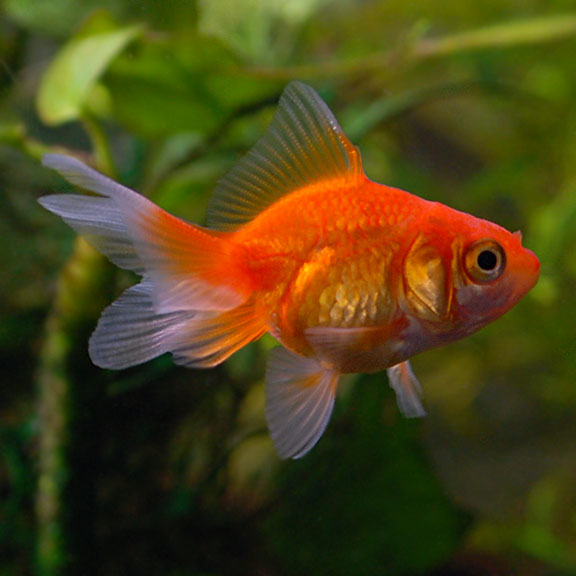

In [4]:
Image.open('goldfish.jpg')

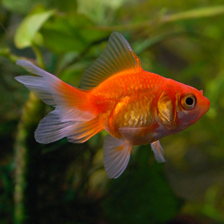

In [5]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [6]:
gold_fish = np.array(gold_fish) / 255.0
gold_fish.shape

(224, 224, 3)

In [7]:
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [8]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [9]:
classifier.predict(gold_fish[np.newaxis, ...])

1/1 [==============================] - 3s 3s/step


array([[ 0.22101447,  2.047492  ,  9.622561  , ..., -1.4621571 ,
        -0.28146517, -0.25984728]], dtype=float32)

In [10]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 0s 20ms/step


(1, 1001)

In [11]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [12]:
image_labels = []
with open('ImageNetLabels.txt', 'r') as f:
  image_labels = f.read().splitlines()

image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [13]:
image_labels[predicted_label_index]

'goldfish'

In [14]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)
data_dir

'./datasets/flower_photos'

In [15]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [16]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/8949720453_66e8304c30.jpg'),
 PosixPath('datasets/flower_photos/roses/5526964611_76ef13025c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2949945463_366bc63079_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9216323421_f737c1d50e.jpg'),
 PosixPath('datasets/flower_photos/roses/6069602140_866eecf7c2_m.jpg')]

In [17]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [18]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/8949720453_66e8304c30.jpg'),
 PosixPath('datasets/flower_photos/roses/5526964611_76ef13025c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2949945463_366bc63079_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9216323421_f737c1d50e.jpg'),
 PosixPath('datasets/flower_photos/roses/6069602140_866eecf7c2_m.jpg')]

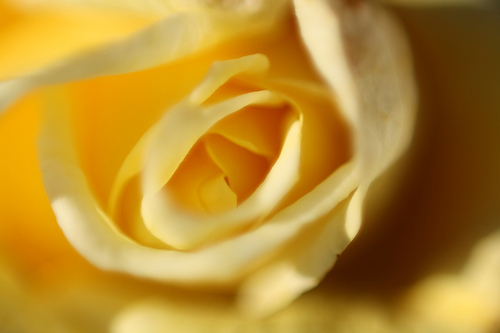

In [19]:
Image.open(str(roses[3]))

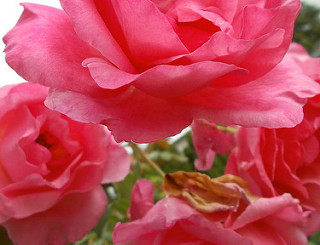

In [20]:
Image.open(str(roses[5]))

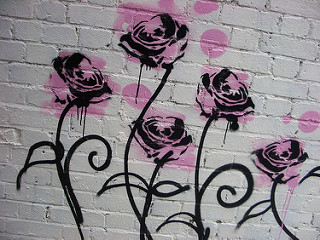

In [21]:
Image.open(str(roses[7]))

In [22]:
flower_image_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [23]:
flower_label_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [24]:
str(flower_image_dict['roses'][0])

'datasets/flower_photos/roses/8949720453_66e8304c30.jpg'

In [25]:
img = cv2.imread(str(flower_image_dict['roses'][0]))

In [26]:
img.shape

(260, 500, 3)

In [27]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [28]:
X, y = [], []

for flower_name, images in flower_image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, IMAGE_SHAPE)
    X.append(resized_img)
    y.append(flower_label_dict[flower_name])

In [29]:
X = np.array(X)
y = np.array(y)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [32]:
X_train_scaled[0]

array([[[0.01568627, 0.12941176, 0.10980392],
        [0.01960784, 0.1372549 , 0.11764706],
        [0.01960784, 0.13333333, 0.1254902 ],
        ...,
        [0.35294118, 0.43921569, 0.54901961],
        [0.3372549 , 0.42745098, 0.52941176],
        [0.37254902, 0.4627451 , 0.56470588]],

       [[0.02352941, 0.14117647, 0.12156863],
        [0.01960784, 0.1372549 , 0.11764706],
        [0.00784314, 0.12156863, 0.10980392],
        ...,
        [0.3372549 , 0.42352941, 0.53333333],
        [0.34509804, 0.43529412, 0.5372549 ],
        [0.36470588, 0.45490196, 0.55686275]],

       [[0.01960784, 0.1372549 , 0.11764706],
        [0.01176471, 0.12941176, 0.10980392],
        [0.01960784, 0.13333333, 0.12156863],
        ...,
        [0.34117647, 0.42745098, 0.5372549 ],
        [0.34509804, 0.43529412, 0.5372549 ],
        [0.38823529, 0.47843137, 0.58039216]],

       ...,

       [[0.21960784, 0.2627451 , 0.25882353],
        [0.25098039, 0.25882353, 0.2627451 ],
        [0.21960784, 0

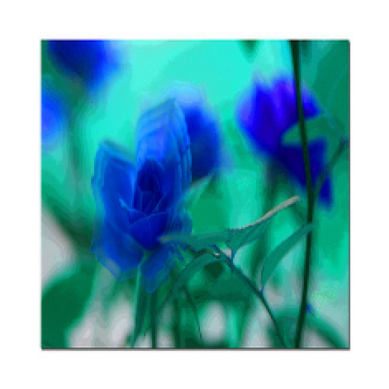

In [33]:
plt.axis('off')
plt.imshow(X[0])

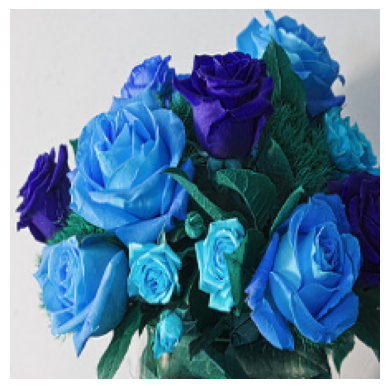

In [34]:
plt.axis('off')
plt.imshow(X[1])

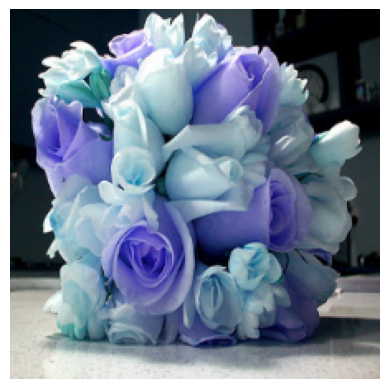

In [35]:
plt.axis('off')
plt.imshow(X[2])

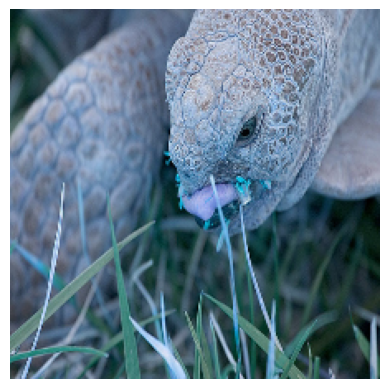

In [36]:
plt.axis('off')
plt.imshow(X_train_scaled[0])

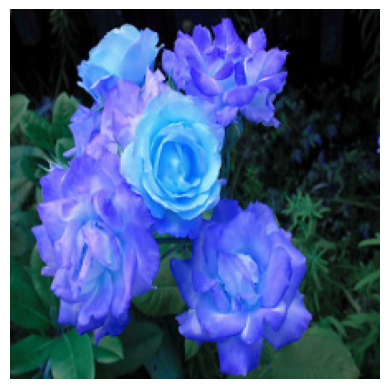

In [37]:
plt.axis('off')
plt.imshow(X_train_scaled[1])

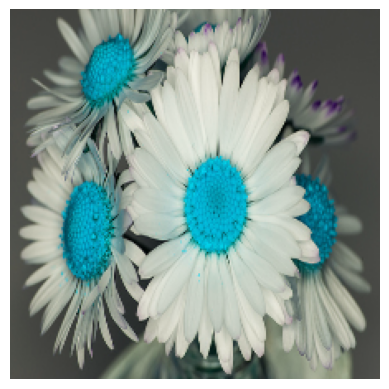

In [38]:
plt.axis('off')
plt.imshow(X_train_scaled[2])

In [39]:
classifier.predict(np.array([X_test_scaled[0],X_test_scaled[1],X_test_scaled[2]]))

1/1 [==============================] - 1s 855ms/step


array([[ 0.10603866,  0.41855717,  0.02541262, ...,  0.6801263 ,
         2.6113245 ,  1.0323092 ],
       [ 0.2844452 , -0.12630494,  4.5491347 , ...,  1.145887  ,
        -1.0720464 ,  1.0485342 ],
       [ 0.23379698,  0.9600196 , -0.6073055 , ...,  1.8656305 ,
        -0.06227995,  0.12419657]], dtype=float32)

In [40]:
predicted = classifier.predict(np.array([X_test_scaled[0],X_test_scaled[1],X_test_scaled[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 22ms/step


array([986, 974, 947])

In [41]:
image_labels[986]

'daisy'

In [42]:
image_labels[974]

'coral reef'

In [43]:
image_labels[947]

'cardoon'

## Retrain the Model

In [44]:
feature_extraction_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_wihtout_top_layer = hub.KerasLayer(
    feature_extraction_model,
    input_shape=(224, 224, 3),
    trainable=False
)

In [45]:
num_of_flowers = 5

model_flowers = tf.keras.Sequential([
    pretrained_model_wihtout_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model_flowers.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [46]:
model_flowers.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [ ]:
model_flowers.fit(X_train_scaled, y_train, epochs=5)

In [ ]:
model_flowers.evaluate(X_test_scaled, y_test)